In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'x1':[4,2,1,3,1,6],
    'x2':[1,8,0,2,4,7],
    'y':[2,-14,1,-1,-7,-8]
}

In [12]:
df = pd.DataFrame(data)
df
last_column = df.iloc[:, -1]

min_val = last_column.min()
max_val = last_column.max()

df.iloc[:, -1] = (last_column - min_val) / (max_val - min_val)

print(df)

   x1  x2       y
0   4   1  1.0000
1   2   8  0.0000
2   1   0  0.9375
3   3   2  0.8125
4   1   4  0.4375
5   6   7  0.3750


In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [14]:
def forwardprop(data, param):
    y = []
    temp =0
    X = data.to_numpy()
    b = param[-1]
    W = param[:-1]
    Y = X@ (W.T) + b
    Z = sigmoid(Y)
    return Z

In [15]:
def grad_descent(data, param, y_pred,erros, show_cost =False):
    y_act = data.iloc[:,-1].to_numpy()
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    err = -1*np.sum(((y_act*np.log(y_pred))+(1-y_act)*np.log(1-y_pred))) / len(y_act)
    erros.append(err)
    if show_cost:
        print("error: ", err)
    grads = []
    temp = (y_pred-y_act)
    for i in data.iloc[:,:-1].columns:
        X = data[i]
        dJ_dw = np.dot(temp, X)/len(y_act)
        grads.append(dJ_dw)
    dJ_db = np.sum((temp))/len(y_act)
    grads.append(dJ_db)
    return np.array(grads)

In [16]:
def backprop(data, param, grads, lr= 0.01):
    param = param- lr *grads
    return param

In [17]:
def model(df, epochs, learn =0.01, shcost =False):
    params =[]
    errors = []
    for i in df.iloc[:,:-1].columns:
        params.append(np.random.rand())
    params.append(np.random.rand())
    params = np.array(params)
    for i in range(epochs):
        Y_pred = forwardprop(df.iloc[:,:-1], params)
        grads = grad_descent(df, params, Y_pred,errors,   show_cost =shcost)
        params = backprop(df, params, grads, lr =learn)
        print(params)
    return params, errors

In [23]:
params, errors = model(df, 5000, learn =0.01, shcost =True)

error:  2.379194846815713
[0.20807028 0.66550358 0.78708516]
error:  2.3077785288116073
[0.19793527 0.64106091 0.78377375]
error:  2.236773695144539
[0.18787756 0.61667205 0.78049064]
error:  2.1662157439610588
[0.17790245 0.59234281 0.77723767]
error:  2.0961438143401065
[0.16801567 0.56807976 0.77401684]
error:  2.0266013111046473
[0.15822342 0.54389036 0.7708303 ]
error:  1.9576365136502976
[0.14853245 0.51978308 0.76768036]
error:  1.8893032773323384
[0.13895013 0.49576761 0.76456956]
error:  1.8216618333203076
[0.12948453 0.47185501 0.76150063]
error:  1.7547796878359405
[0.12014452 0.44805795 0.75847653]
error:  1.6887326133043328
[0.1109399  0.42439098 0.7555005 ]
error:  1.623605710892236
[0.10188153 0.40087079 0.75257608]
error:  1.5594945047340865
[0.09298144 0.3775165  0.74970709]
error:  1.4965060014345284
[0.08425305 0.35435003 0.74689774]
error:  1.4347596132129852
[0.07571122 0.33139637 0.74415258]
error:  1.3743877995167317
[0.06737247 0.30868391 0.74147658]
error:  1.3

error:  0.3893329690447322
[ 0.50241914 -0.60356169  0.98794777]
error:  0.38929744001091665
[ 0.50269701 -0.60385563  0.98838438]
error:  0.38926205028437844
[ 0.50297376 -0.60414868  0.98882072]
error:  0.38922679890702555
[ 0.5032494  -0.60444084  0.98925678]
error:  0.3891916849287573
[ 0.50352394 -0.60473211  0.98969257]
error:  0.3891567074073852
[ 0.50379736 -0.60502249  0.99012808]
error:  0.3891218654085596
[ 0.50406969 -0.60531199  0.99056332]
error:  0.3890871580056923
[ 0.50434093 -0.60560062  0.99099829]
error:  0.38905258427988426
[ 0.50461107 -0.60588837  0.99143299]
error:  0.3890181433198509
[ 0.50488013 -0.60617525  0.99186741]
error:  0.38898383422184996
[ 0.50514811 -0.60646126  0.99230157]
error:  0.38894965608960996
[ 0.50541502 -0.60674641  0.99273545]
error:  0.3889156080342588
[ 0.50568085 -0.6070307   0.99316907]
error:  0.3888816891742534
[ 0.50594561 -0.60731414  0.99360242]
error:  0.38884789863531083
[ 0.50620932 -0.60759672  0.9940355 ]
error:  0.38881423

[ 0.55844325 -0.71650799  1.3676904 ]
error:  0.3734977427135868
[ 0.558423   -0.71654237  1.36796471]
error:  0.373490059842498
[ 0.55840274 -0.71657672  1.36823894]
error:  0.373482382313785
[ 0.55838245 -0.71661103  1.36851307]
error:  0.3734747101226934
[ 0.55836215 -0.71664531  1.3687871 ]
error:  0.37346704326447694
[ 0.55834182 -0.71667956  1.36906104]
error:  0.3734593817343974
[ 0.55832148 -0.71671378  1.36933488]
error:  0.3734517255277246
[ 0.55830111 -0.71674796  1.36960863]
error:  0.3734440746397361
[ 0.55828073 -0.71678211  1.36988229]
error:  0.3734364290657179
[ 0.55826033 -0.71681623  1.37015585]
error:  0.37342878880096325
[ 0.5582399  -0.71685031  1.37042932]
error:  0.37342115384077385
[ 0.55821946 -0.71688436  1.37070269]
error:  0.37341352418045876
[ 0.558199   -0.71691838  1.37097597]
error:  0.3734058998153353
[ 0.55817852 -0.71695237  1.37124915]
error:  0.3733982807407284
[ 0.55815802 -0.71698633  1.37152224]
error:  0.3733906669519707
[ 0.5581375  -0.7170202

[ 0.53617701 -0.74211398  1.60269047]
error:  0.36785948964317927
[ 0.53615713 -0.74213443  1.60288727]
error:  0.3678555359346876
[ 0.53613726 -0.74215489  1.603084  ]
error:  0.3678515847302046
[ 0.53611739 -0.74217533  1.60328068]
error:  0.367847636027987
[ 0.53609753 -0.74219578  1.60347729]
error:  0.3678436898262931
[ 0.53607768 -0.74221621  1.60367384]
error:  0.3678397461233829
[ 0.53605784 -0.74223664  1.60387033]
error:  0.36783580491751716
[ 0.536038   -0.74225707  1.60406675]
error:  0.3678318662069584
[ 0.53601818 -0.74227748  1.60426311]
error:  0.36782792998997027
[ 0.53599836 -0.7422979   1.60445941]
error:  0.3678239962648178
[ 0.53597854 -0.7423183   1.60465565]
error:  0.36782006502976766
[ 0.53595874 -0.74233871  1.60485183]
error:  0.36781613628308746
[ 0.53593894 -0.7423591   1.60504794]
error:  0.3678122100230463
[ 0.53591915 -0.74237949  1.605244  ]
error:  0.36780828624791456
[ 0.53589936 -0.74239988  1.60543999]
error:  0.3678043649559643
[ 0.53587958 -0.7424

[ 0.52118158 -0.75859432  1.7570471 ]
error:  0.36513703688924753
[ 0.52116785 -0.7586108   1.75719625]
error:  0.36513476671739115
[ 0.52115413 -0.75862728  1.75734535]
error:  0.3651324979118075
[ 0.52114041 -0.75864375  1.75749441]
error:  0.36513023047160437
[ 0.5211267  -0.75866022  1.75764342]
error:  0.3651279643958903
[ 0.521113   -0.75867669  1.75779239]
error:  0.36512569968377423
[ 0.5210993  -0.75869315  1.75794131]
error:  0.3651234363343661
[ 0.52108561 -0.75870961  1.75809019]
error:  0.3651211743467762
[ 0.52107192 -0.75872606  1.75823903]
error:  0.3651189137201157
[ 0.52105824 -0.75874252  1.75838782]
error:  0.3651166544534961
[ 0.52104457 -0.75875896  1.75853656]
error:  0.3651143965460298
[ 0.5210309  -0.75877541  1.75868526]
error:  0.36511213999682973
[ 0.52101723 -0.75879185  1.75883391]
error:  0.36510988480500933
[ 0.52100358 -0.75880828  1.75898253]
error:  0.365107630969683
[ 0.52098992 -0.75882471  1.75913109]
error:  0.36510537848996555
[ 0.52097628 -0.758

In [30]:
Y_pred = forwardprop(df.iloc[:,:-1], params)
Y_pred = np.where(Y_pred>0.5, 1, 0)
Y_pred

array([1, 0, 1, 1, 0, 0])

In [32]:
y_act = df.iloc[:,-1].to_numpy()
y_act = np.where(y_act>0.5, 1, 0)
error = np.sum((y_act - Y_pred)**2) / len(y_act)
accuracy = (1 - error)
print('accuracy: ', accuracy)

accuracy:  1.0


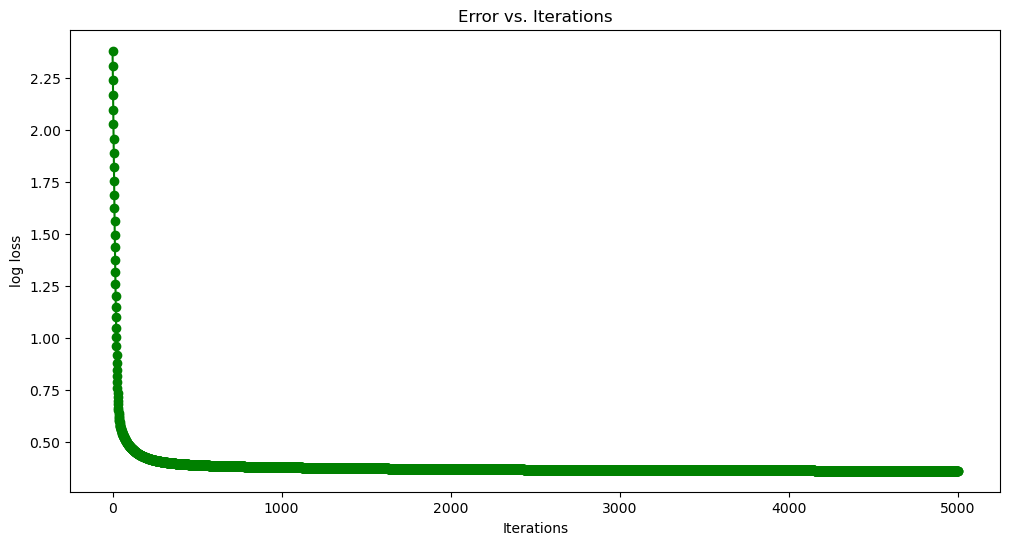

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(errors, color='green', marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('log loss')
plt.title('Error vs. Iterations')
plt.show()